# Estacionariedad de Procesos Estocasticos

Basado en el notebook de [Sasha Spors](https://github.com/spatialaudio/digital-signal-processing-lecture/blob/master/random_signals_LTI_systems/correlation_functions.ipynb)

## Calculo de la funcion de autocorrelación

Importamos las librerias

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generamos una variables aleatoria $x[k]$ con 10k muestras y apartir de esta obtenemos la respuesta de un sistema dinámico $y[k] = \sum_{\kappa} h[k]x[k-\kappa]$, $\kappa$ representa el desplazamiento (retrazos o adelantos) de la variable $x[k]$. 

In [17]:
L = 10000  # numero de muestras
K = 30  # limite de desplamientos para R_XX

# generacion de señal de entrada (rudio blanco Gaussiano)
np.random.seed(1)
x = np.random.normal(size=L)
# compute system response
y = np.convolve(x, [1, 1, 1, 1, 1], mode='full')

Caculamos la función de autocorrelación $R_{YY}(\kappa)$, de la cual observamos que es máxima en 0 y tiene simetría par. 

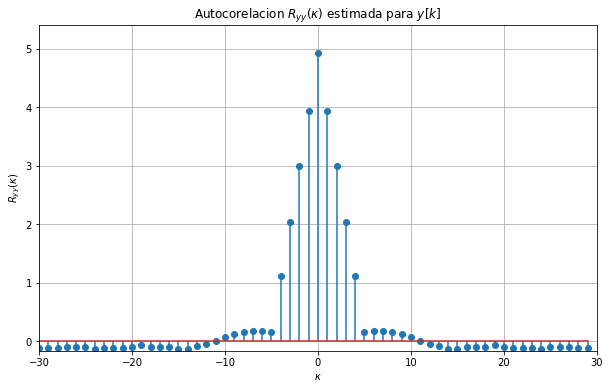

In [18]:
# Calculo de Ryy truncada
Ryy = 1/len(y) * np.correlate(y, y, mode='full')
Ryy = Ryy[len(y)-K-1:len(y)+K-1]
kappa = np.arange(-K, K)

# plot ACF
plt.figure(figsize=(10, 6))
plt.stem(kappa, Ryy, use_line_collection=True)
plt.title('Autocorelacion $R_{yy}(\kappa)$ estimada para $y[k]$')
plt.ylabel(r'$R_{yy}(\kappa)$')
plt.xlabel(r'$\kappa$')
plt.axis([-K, K, 1.2*min(Ryy), 1.1*max(Ryy)])
plt.grid()

## Autocovarianza para la estimación de un sistema dinámico 

Text(0, 0.5, '$\\hat{h}[k]$, $h[k]$')

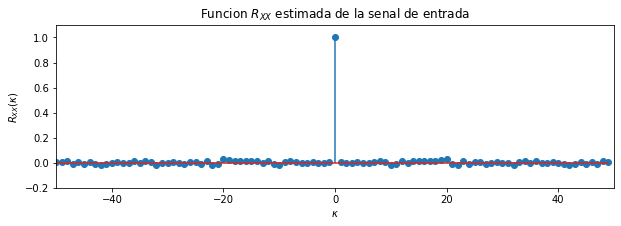

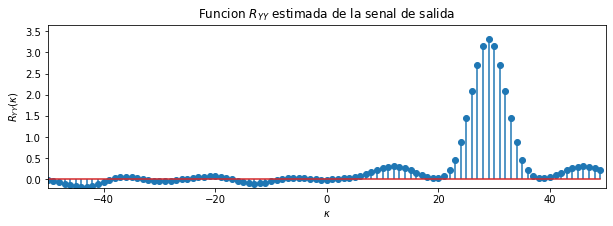

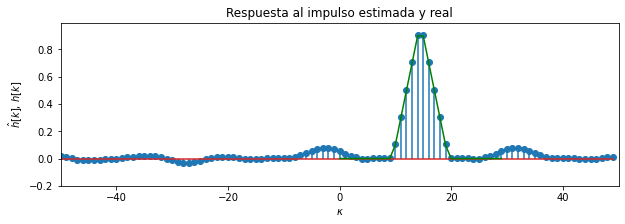

In [19]:
import scipy.signal as sig


N = 10000  # numero de muestras señal de entrada
K = 50  # limite de desplazamiento para Ryy

# Generar senal de entrada
np.random.seed(5)
x = np.random.normal(size=N)
# respuesta al impulso del sistema
h = np.concatenate((np.zeros(10), sig.triang(10), np.zeros(10)))
# senal de salida a traves de la convolucion
y = np.convolve(h, x, mode='full')

# calculo de las funciones de correlacion
Rxx = 1/len(x) * np.correlate(x, x, mode='full')
Ryy = 1/len(y) * np.correlate(y, y, mode='full')
Ryx = 1/len(y) * np.correlate(y, x, mode='full')


def plot_correlation_function(cf):
    cf = cf[N-K-1:N+K-1]
    kappa = np.arange(-len(cf)//2, len(cf)//2)
    plt.stem(kappa, cf, use_line_collection=True)
    plt.xlabel(r'$\kappa$')
    plt.axis([-K, K, -0.2, 1.1*max(cf)])


# plot ACFs and CCF
plt.rc('figure', figsize=(10, 3))
plt.figure()
plot_correlation_function(Rxx)
plt.title('Funcion $R_{XX}$ estimada de la senal de entrada')
plt.ylabel(r'$R_{XX}(\kappa)$')

plt.figure()
plot_correlation_function(Ryy)
plt.title('Funcion $R_{YY}$ estimada de la senal de salida')
plt.ylabel(r'$R_{YY}(\kappa)$')

plt.figure()
plot_correlation_function(Ryx)
plt.plot(np.arange(len(h)), h, 'g-')
plt.title('Respuesta al impulso estimada y real')
plt.ylabel(r'$\hat{h}[k]$, $h[k]$')